<a href="https://colab.research.google.com/github/jeanpmalolo/SPICE-2024/blob/main/waveheight_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Wave Height Predictions with ARIMA

## Introduction


The goal is to use machine learning to build a time-series model that can be used to predict wave height measurements for the selected buoy area. We'll be building an ARIMA model.

The dataset comes from the [National Data Buoy Center](https://www.ndbc.noaa.gov/).

The buoy used for this example is Buoy #[51101](https://www.ndbc.noaa.gov/station_page.php?station=51101), which is located Northwest of Kauai, Hawaii.

Testing.

### ARIMA

You can read this article for more info.
https://medium.com/analytics-vidhya/arima-for-dummies-ba761d59a051


# Imports and Data

## Imports

The below code chunk loads in all your packages and imports, make sure to run this every time you start your session.

Packages include all the tools you need to successfully run all your code and analysis.

In [1]:
!pip install statsmodels
!pip install pmdarima
!pip install seaborn
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn import linear_model

from pandas import to_datetime
import datetime
from datetime import datetime
import pandas as pd
#import pmdarima as pm
import itertools
import warnings
import matplotlib.pyplot as plt
from matplotlib import pyplot

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict

warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.9 MB/s eta 0:00:00


## Data

To load in our data, we use the pandas function read_csv to get the data directly from the National Data Buoy Center and are assigning it to the variable called *df1*.

A variable is a place/object where we can store information.

In [117]:
df16 = pd.read_csv('https://www.ndbc.noaa.gov/view_text_file.php?filename=52201h2016.txt.gz&dir=data/historical/stdmet/', delimiter= '\s+', index_col=False)
df17 = pd.read_csv('https://www.ndbc.noaa.gov/view_text_file.php?filename=52201h2017.txt.gz&dir=data/historical/stdmet/', delimiter= '\s+', index_col=False)
df18 = pd.read_csv('https://www.ndbc.noaa.gov/view_text_file.php?filename=52201h2018.txt.gz&dir=data/historical/stdmet/', delimiter= '\s+', index_col=False)
df19 = pd.read_csv('https://www.ndbc.noaa.gov/view_text_file.php?filename=52201h2019.txt.gz&dir=data/historical/stdmet/', delimiter= '\s+', index_col=False)

In [118]:
df16.head() # looking at first 5 rows

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2016,05,04,19,00,999,99.0,99.0,1.60,8.33,6.28,50,9999.0,999.0,28.9,999.0,99.0,99.00
2,2016,05,04,19,30,999,99.0,99.0,1.77,7.69,6.30,57,9999.0,999.0,28.9,999.0,99.0,99.00
3,2016,05,04,20,00,999,99.0,99.0,1.79,9.09,6.36,60,9999.0,999.0,28.9,999.0,99.0,99.00
4,2016,05,04,20,30,999,99.0,99.0,1.69,9.09,5.91,68,9999.0,999.0,28.9,999.0,99.0,99.00


In [4]:
df17.head() # looking at first 5 rows

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2017,01,01,00,00,999,99.0,99.0,1.89,10.53,6.08,46,9999.0,999.0,29.2,999.0,99.0,99.00
2,2017,01,01,00,30,999,99.0,99.0,1.96,11.11,6.12,39,9999.0,999.0,29.2,999.0,99.0,99.00
3,2017,01,01,01,00,999,99.0,99.0,2.15,11.11,6.29,22,9999.0,999.0,29.2,999.0,99.0,99.00
4,2017,01,01,01,30,999,99.0,99.0,2.23,9.88,6.46,12,9999.0,999.0,29.2,999.0,99.0,99.00


In [107]:
df18.head() # looking at first 5 rows

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2018,01,01,00,00,999,99.0,99.0,0.97,11.11,6.04,73,9999.0,999.0,29.1,999.0,99.0,99.00
2,2018,01,01,00,30,999,99.0,99.0,0.84,12.50,6.30,274,9999.0,999.0,29.1,999.0,99.0,99.00
3,2018,01,01,01,00,999,99.0,99.0,0.85,11.11,6.70,161,9999.0,999.0,29.0,999.0,99.0,99.00
4,2018,01,01,01,30,999,99.0,99.0,0.89,11.76,6.36,36,9999.0,999.0,29.0,999.0,99.0,99.00


In [6]:
df19.head() # looking at first 5 rows

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2019,01,01,00,15,999,99.0,99.0,2.08,9.88,6.77,111,9999.0,999.0,28.7,999.0,99.0,99.00
2,2019,01,01,00,45,999,99.0,99.0,1.95,9.88,6.70,95,9999.0,999.0,28.7,999.0,99.0,99.00
3,2019,01,01,01,15,999,99.0,99.0,2.17,9.88,7.02,104,9999.0,999.0,28.7,999.0,99.0,99.00
4,2019,01,01,01,45,999,99.0,99.0,2.00,10.53,7.00,122,9999.0,999.0,28.7,999.0,99.0,99.00


# Exploring the Data

For this project, the target variable we'll focus on is WVHT (wave height in meters).

In [119]:
df16.info() # looking at basic information about your variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10438 entries, 0 to 10437
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #YY     10438 non-null  object
 1   MM      10438 non-null  object
 2   DD      10438 non-null  object
 3   hh      10438 non-null  object
 4   mm      10438 non-null  object
 5   WDIR    10438 non-null  object
 6   WSPD    10438 non-null  object
 7   GST     10438 non-null  object
 8   WVHT    10438 non-null  object
 9   DPD     10438 non-null  object
 10  APD     10438 non-null  object
 11  MWD     10438 non-null  object
 12  PRES    10438 non-null  object
 13  ATMP    10438 non-null  object
 14  WTMP    10438 non-null  object
 15  DEWP    10438 non-null  object
 16  VIS     10438 non-null  object
 17  TIDE    10438 non-null  object
dtypes: object(18)
memory usage: 1.4+ MB


In [120]:
na_values = pd.DataFrame(df16.isna().sum()) # looking at na values
na_values # typing in the variable name prints it out for you

,0
#YY,0
MM,0
DD,0
hh,0
mm,0
WDIR,0
WSPD,0
GST,0
WVHT,0
DPD,0


From the above information, we learn that the dataset currently has 8,645 rows and 18 columns.

Let's look to see if we have NA values (missing values) in our dataset.

We're making another variable called *na_values*, to see if any column has NA values.

In [108]:
print(len(df16))
print(len(df17))
print(len(df18))
print(len(df19))

10438
16246
16640
9785


In [10]:
df16

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2016,05,04,19,00,999,99.0,99.0,1.60,8.33,6.28,50,9999.0,999.0,28.9,999.0,99.0,99.00
2,2016,05,04,19,30,999,99.0,99.0,1.77,7.69,6.30,57,9999.0,999.0,28.9,999.0,99.0,99.00
3,2016,05,04,20,00,999,99.0,99.0,1.79,9.09,6.36,60,9999.0,999.0,28.9,999.0,99.0,99.00
4,2016,05,04,20,30,999,99.0,99.0,1.69,9.09,5.91,68,9999.0,999.0,28.9,999.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10433,2016,12,31,21,30,999,99.0,99.0,1.75,10.53,6.13,35,9999.0,999.0,29.1,999.0,99.0,99.00
10434,2016,12,31,22,00,999,99.0,99.0,1.66,9.09,6.36,39,9999.0,999.0,29.1,999.0,99.0,99.00
10435,2016,12,31,22,30,999,99.0,99.0,1.78,9.88,6.33,25,9999.0,999.0,29.1,999.0,99.0,99.00
10436,2016,12,31,23,00,999,99.0,99.0,1.85,10.53,6.31,28,9999.0,999.0,29.2,999.0,99.0,99.00


# Data Cleaning

We need to clean our data to help our analysis run smoother and format it properly.

We'll be deleting the first two rows of our dataset as it just repeats the column names and has a row from 2016, and assigning it to a new variable called df1_clean.

In [121]:
df16_clean = df16.iloc[2:] # dropping the first two rows
df16_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
2,2016,05,04,19,30,999,99.0,99.0,1.77,7.69,6.30,57,9999.0,999.0,28.9,999.0,99.0,99.00
3,2016,05,04,20,00,999,99.0,99.0,1.79,9.09,6.36,60,9999.0,999.0,28.9,999.0,99.0,99.00
4,2016,05,04,20,30,999,99.0,99.0,1.69,9.09,5.91,68,9999.0,999.0,28.9,999.0,99.0,99.00
5,2016,05,04,21,00,999,99.0,99.0,1.62,9.88,6.39,60,9999.0,999.0,28.9,999.0,99.0,99.00
6,2016,05,04,21,30,999,99.0,99.0,1.66,9.88,6.74,56,9999.0,999.0,28.9,999.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10433,2016,12,31,21,30,999,99.0,99.0,1.75,10.53,6.13,35,9999.0,999.0,29.1,999.0,99.0,99.00
10434,2016,12,31,22,00,999,99.0,99.0,1.66,9.09,6.36,39,9999.0,999.0,29.1,999.0,99.0,99.00
10435,2016,12,31,22,30,999,99.0,99.0,1.78,9.88,6.33,25,9999.0,999.0,29.1,999.0,99.0,99.00
10436,2016,12,31,23,00,999,99.0,99.0,1.85,10.53,6.31,28,9999.0,999.0,29.2,999.0,99.0,99.00


In [12]:
df17_clean = df17.iloc[2:] # dropping the first two rows
df17_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
2,2017,01,01,00,30,999,99.0,99.0,1.96,11.11,6.12,39,9999.0,999.0,29.2,999.0,99.0,99.00
3,2017,01,01,01,00,999,99.0,99.0,2.15,11.11,6.29,22,9999.0,999.0,29.2,999.0,99.0,99.00
4,2017,01,01,01,30,999,99.0,99.0,2.23,9.88,6.46,12,9999.0,999.0,29.2,999.0,99.0,99.00
5,2017,01,01,02,00,999,99.0,99.0,2.26,10.53,6.71,39,9999.0,999.0,29.2,999.0,99.0,99.00
6,2017,01,01,02,30,999,99.0,99.0,2.05,10.53,6.43,26,9999.0,999.0,29.2,999.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16241,2017,12,31,21,30,999,99.0,99.0,1.19,13.33,5.65,1,9999.0,999.0,28.9,999.0,99.0,99.00
16242,2017,12,31,22,00,999,99.0,99.0,1.20,12.50,5.90,11,9999.0,999.0,28.9,999.0,99.0,99.00
16243,2017,12,31,22,30,999,99.0,99.0,1.19,11.11,5.85,53,9999.0,999.0,29.0,999.0,99.0,99.00
16244,2017,12,31,23,00,999,99.0,99.0,1.11,10.53,5.81,64,9999.0,999.0,29.0,999.0,99.0,99.00


In [109]:
df18_clean = df18.iloc[2:] # dropping the first two rows
df18_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
2,2018,01,01,00,30,999,99.0,99.0,0.84,12.50,6.30,274,9999.0,999.0,29.1,999.0,99.0,99.00
3,2018,01,01,01,00,999,99.0,99.0,0.85,11.11,6.70,161,9999.0,999.0,29.0,999.0,99.0,99.00
4,2018,01,01,01,30,999,99.0,99.0,0.89,11.76,6.36,36,9999.0,999.0,29.0,999.0,99.0,99.00
5,2018,01,01,02,00,999,99.0,99.0,1.01,12.50,6.56,39,9999.0,999.0,29.0,999.0,99.0,99.00
6,2018,01,01,02,30,999,99.0,99.0,1.13,11.11,6.51,33,9999.0,999.0,29.0,999.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16635,2018,12,31,21,15,999,99.0,99.0,1.98,9.88,6.72,104,9999.0,999.0,28.7,999.0,99.0,99.00
16636,2018,12,31,21,45,999,99.0,99.0,1.99,10.53,6.24,125,9999.0,999.0,28.7,999.0,99.0,99.00
16637,2018,12,31,22,15,999,99.0,99.0,1.99,10.53,5.90,77,9999.0,999.0,28.6,999.0,99.0,99.00
16638,2018,12,31,22,45,999,99.0,99.0,2.06,10.53,7.04,115,9999.0,999.0,28.6,999.0,99.0,99.00


In [14]:
df19_clean = df19.iloc[2:] # dropping the first two rows
df19_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
2,2019,01,01,00,45,999,99.0,99.0,1.95,9.88,6.70,95,9999.0,999.0,28.7,999.0,99.0,99.00
3,2019,01,01,01,15,999,99.0,99.0,2.17,9.88,7.02,104,9999.0,999.0,28.7,999.0,99.0,99.00
4,2019,01,01,01,45,999,99.0,99.0,2.00,10.53,7.00,122,9999.0,999.0,28.7,999.0,99.0,99.00
5,2019,01,01,02,15,999,99.0,99.0,2.08,9.88,7.01,121,9999.0,999.0,28.7,999.0,99.0,99.00
6,2019,01,01,02,45,999,99.0,99.0,2.14,10.53,6.98,123,9999.0,999.0,28.7,999.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9780,2019,12,31,21,45,999,99.0,99.0,2.14,15.38,7.30,5,9999.0,999.0,29.3,999.0,99.0,99.00
9781,2019,12,31,22,15,999,99.0,99.0,2.39,18.18,8.02,7,9999.0,999.0,29.3,999.0,99.0,99.00
9782,2019,12,31,22,45,999,99.0,99.0,2.71,16.67,8.65,357,9999.0,999.0,29.3,999.0,99.0,99.00
9783,2019,12,31,23,15,999,99.0,99.0,2.44,15.38,8.26,1,9999.0,999.0,29.3,999.0,99.0,99.00


In [122]:
df16_clean = df16_clean.astype({'#YY' : str, 'MM' : str, 'DD' : str, 'hh' : str, 'mm' : str}) # converting these columns to a string data type
df16_clean['Date'] = df16_clean['#YY'] + '-' + df16_clean['MM'] + '-' + df16_clean['DD'] + ' ' + df16_clean['hh'] + ':' + df16_clean['mm'] # combining all the datetime info into a Date column
df16_clean = df16_clean.drop(columns=['#YY','MM','DD','hh','mm']) # deleting the old date and time columns
df16_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
2,999,99.0,99.0,1.77,7.69,6.30,57,9999.0,999.0,28.9,999.0,99.0,99.00,2016-05-04 19:30
3,999,99.0,99.0,1.79,9.09,6.36,60,9999.0,999.0,28.9,999.0,99.0,99.00,2016-05-04 20:00
4,999,99.0,99.0,1.69,9.09,5.91,68,9999.0,999.0,28.9,999.0,99.0,99.00,2016-05-04 20:30
5,999,99.0,99.0,1.62,9.88,6.39,60,9999.0,999.0,28.9,999.0,99.0,99.00,2016-05-04 21:00
6,999,99.0,99.0,1.66,9.88,6.74,56,9999.0,999.0,28.9,999.0,99.0,99.00,2016-05-04 21:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10433,999,99.0,99.0,1.75,10.53,6.13,35,9999.0,999.0,29.1,999.0,99.0,99.00,2016-12-31 21:30
10434,999,99.0,99.0,1.66,9.09,6.36,39,9999.0,999.0,29.1,999.0,99.0,99.00,2016-12-31 22:00
10435,999,99.0,99.0,1.78,9.88,6.33,25,9999.0,999.0,29.1,999.0,99.0,99.00,2016-12-31 22:30
10436,999,99.0,99.0,1.85,10.53,6.31,28,9999.0,999.0,29.2,999.0,99.0,99.00,2016-12-31 23:00


As you can see, there are separate columns for year, month, day, hour, and minute. We need to combine these columns in order to create a single datetime column.

In [16]:
df17_clean = df17_clean.astype({'#YY' : str, 'MM' : str, 'DD' : str, 'hh' : str, 'mm' : str}) # converting these columns to a string data type
df17_clean['Date'] = df17_clean['#YY'] + '-' + df17_clean['MM'] + '-' + df17_clean['DD'] + ' ' + df17_clean['hh'] + ':' + df17_clean['mm'] # combining all the datetime info into a Date column
df17_clean = df17_clean.drop(columns=['#YY','MM','DD','hh','mm']) # deleting the old date and time columns
df17_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
2,999,99.0,99.0,1.96,11.11,6.12,39,9999.0,999.0,29.2,999.0,99.0,99.00,2017-01-01 00:30
3,999,99.0,99.0,2.15,11.11,6.29,22,9999.0,999.0,29.2,999.0,99.0,99.00,2017-01-01 01:00
4,999,99.0,99.0,2.23,9.88,6.46,12,9999.0,999.0,29.2,999.0,99.0,99.00,2017-01-01 01:30
5,999,99.0,99.0,2.26,10.53,6.71,39,9999.0,999.0,29.2,999.0,99.0,99.00,2017-01-01 02:00
6,999,99.0,99.0,2.05,10.53,6.43,26,9999.0,999.0,29.2,999.0,99.0,99.00,2017-01-01 02:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16241,999,99.0,99.0,1.19,13.33,5.65,1,9999.0,999.0,28.9,999.0,99.0,99.00,2017-12-31 21:30
16242,999,99.0,99.0,1.20,12.50,5.90,11,9999.0,999.0,28.9,999.0,99.0,99.00,2017-12-31 22:00
16243,999,99.0,99.0,1.19,11.11,5.85,53,9999.0,999.0,29.0,999.0,99.0,99.00,2017-12-31 22:30
16244,999,99.0,99.0,1.11,10.53,5.81,64,9999.0,999.0,29.0,999.0,99.0,99.00,2017-12-31 23:00


In [110]:
df18_clean = df18_clean.astype({'#YY' : str, 'MM' : str, 'DD' : str, 'hh' : str, 'mm' : str}) # converting these columns to a string data type
df18_clean['Date'] = df18_clean['#YY'] + '-' + df18_clean['MM'] + '-' + df18_clean['DD'] + ' ' + df18_clean['hh'] + ':' + df18_clean['mm'] # combining all the datetime info into a Date column
df18_clean = df18_clean.drop(columns=['#YY','MM','DD','hh','mm']) # deleting the old date and time columns
df18_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
2,999,99.0,99.0,0.84,12.50,6.30,274,9999.0,999.0,29.1,999.0,99.0,99.00,2018-01-01 00:30
3,999,99.0,99.0,0.85,11.11,6.70,161,9999.0,999.0,29.0,999.0,99.0,99.00,2018-01-01 01:00
4,999,99.0,99.0,0.89,11.76,6.36,36,9999.0,999.0,29.0,999.0,99.0,99.00,2018-01-01 01:30
5,999,99.0,99.0,1.01,12.50,6.56,39,9999.0,999.0,29.0,999.0,99.0,99.00,2018-01-01 02:00
6,999,99.0,99.0,1.13,11.11,6.51,33,9999.0,999.0,29.0,999.0,99.0,99.00,2018-01-01 02:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16635,999,99.0,99.0,1.98,9.88,6.72,104,9999.0,999.0,28.7,999.0,99.0,99.00,2018-12-31 21:15
16636,999,99.0,99.0,1.99,10.53,6.24,125,9999.0,999.0,28.7,999.0,99.0,99.00,2018-12-31 21:45
16637,999,99.0,99.0,1.99,10.53,5.90,77,9999.0,999.0,28.6,999.0,99.0,99.00,2018-12-31 22:15
16638,999,99.0,99.0,2.06,10.53,7.04,115,9999.0,999.0,28.6,999.0,99.0,99.00,2018-12-31 22:45


In [18]:
df19_clean = df19_clean.astype({'#YY' : str, 'MM' : str, 'DD' : str, 'hh' : str, 'mm' : str}) # converting these columns to a string data type
df19_clean['Date'] = df19_clean['#YY'] + '-' + df19_clean['MM'] + '-' + df19_clean['DD'] + ' ' + df19_clean['hh'] + ':' + df19_clean['mm'] # combining all the datetime info into a Date column
df19_clean = df19_clean.drop(columns=['#YY','MM','DD','hh','mm']) # deleting the old date and time columns
df19_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
2,999,99.0,99.0,1.95,9.88,6.70,95,9999.0,999.0,28.7,999.0,99.0,99.00,2019-01-01 00:45
3,999,99.0,99.0,2.17,9.88,7.02,104,9999.0,999.0,28.7,999.0,99.0,99.00,2019-01-01 01:15
4,999,99.0,99.0,2.00,10.53,7.00,122,9999.0,999.0,28.7,999.0,99.0,99.00,2019-01-01 01:45
5,999,99.0,99.0,2.08,9.88,7.01,121,9999.0,999.0,28.7,999.0,99.0,99.00,2019-01-01 02:15
6,999,99.0,99.0,2.14,10.53,6.98,123,9999.0,999.0,28.7,999.0,99.0,99.00,2019-01-01 02:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9780,999,99.0,99.0,2.14,15.38,7.30,5,9999.0,999.0,29.3,999.0,99.0,99.00,2019-12-31 21:45
9781,999,99.0,99.0,2.39,18.18,8.02,7,9999.0,999.0,29.3,999.0,99.0,99.00,2019-12-31 22:15
9782,999,99.0,99.0,2.71,16.67,8.65,357,9999.0,999.0,29.3,999.0,99.0,99.00,2019-12-31 22:45
9783,999,99.0,99.0,2.44,15.38,8.26,1,9999.0,999.0,29.3,999.0,99.0,99.00,2019-12-31 23:15


In [124]:
#df1_clean = df1_clean[df1_clean['Date'].astype(str).str.endswith('00')]

Now we have one column with all the information we need. To move on, we need the data type for that column to be datetime format.

In [123]:
df16_clean['Date'] = pd.to_datetime(df16_clean['Date'])
df16_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
2,999,99.0,99.0,1.77,7.69,6.30,57,9999.0,999.0,28.9,999.0,99.0,99.00,2016-05-04 19:30:00
3,999,99.0,99.0,1.79,9.09,6.36,60,9999.0,999.0,28.9,999.0,99.0,99.00,2016-05-04 20:00:00
4,999,99.0,99.0,1.69,9.09,5.91,68,9999.0,999.0,28.9,999.0,99.0,99.00,2016-05-04 20:30:00
5,999,99.0,99.0,1.62,9.88,6.39,60,9999.0,999.0,28.9,999.0,99.0,99.00,2016-05-04 21:00:00
6,999,99.0,99.0,1.66,9.88,6.74,56,9999.0,999.0,28.9,999.0,99.0,99.00,2016-05-04 21:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10433,999,99.0,99.0,1.75,10.53,6.13,35,9999.0,999.0,29.1,999.0,99.0,99.00,2016-12-31 21:30:00
10434,999,99.0,99.0,1.66,9.09,6.36,39,9999.0,999.0,29.1,999.0,99.0,99.00,2016-12-31 22:00:00
10435,999,99.0,99.0,1.78,9.88,6.33,25,9999.0,999.0,29.1,999.0,99.0,99.00,2016-12-31 22:30:00
10436,999,99.0,99.0,1.85,10.53,6.31,28,9999.0,999.0,29.2,999.0,99.0,99.00,2016-12-31 23:00:00


In [21]:
df17_clean['Date'] = pd.to_datetime(df17_clean['Date'])
df17_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
2,999,99.0,99.0,1.96,11.11,6.12,39,9999.0,999.0,29.2,999.0,99.0,99.00,2017-01-01 00:30:00
3,999,99.0,99.0,2.15,11.11,6.29,22,9999.0,999.0,29.2,999.0,99.0,99.00,2017-01-01 01:00:00
4,999,99.0,99.0,2.23,9.88,6.46,12,9999.0,999.0,29.2,999.0,99.0,99.00,2017-01-01 01:30:00
5,999,99.0,99.0,2.26,10.53,6.71,39,9999.0,999.0,29.2,999.0,99.0,99.00,2017-01-01 02:00:00
6,999,99.0,99.0,2.05,10.53,6.43,26,9999.0,999.0,29.2,999.0,99.0,99.00,2017-01-01 02:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16241,999,99.0,99.0,1.19,13.33,5.65,1,9999.0,999.0,28.9,999.0,99.0,99.00,2017-12-31 21:30:00
16242,999,99.0,99.0,1.20,12.50,5.90,11,9999.0,999.0,28.9,999.0,99.0,99.00,2017-12-31 22:00:00
16243,999,99.0,99.0,1.19,11.11,5.85,53,9999.0,999.0,29.0,999.0,99.0,99.00,2017-12-31 22:30:00
16244,999,99.0,99.0,1.11,10.53,5.81,64,9999.0,999.0,29.0,999.0,99.0,99.00,2017-12-31 23:00:00


In [111]:
df18_clean['Date'] = pd.to_datetime(df18_clean['Date'])
df18_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
2,999,99.0,99.0,0.84,12.50,6.30,274,9999.0,999.0,29.1,999.0,99.0,99.00,2018-01-01 00:30:00
3,999,99.0,99.0,0.85,11.11,6.70,161,9999.0,999.0,29.0,999.0,99.0,99.00,2018-01-01 01:00:00
4,999,99.0,99.0,0.89,11.76,6.36,36,9999.0,999.0,29.0,999.0,99.0,99.00,2018-01-01 01:30:00
5,999,99.0,99.0,1.01,12.50,6.56,39,9999.0,999.0,29.0,999.0,99.0,99.00,2018-01-01 02:00:00
6,999,99.0,99.0,1.13,11.11,6.51,33,9999.0,999.0,29.0,999.0,99.0,99.00,2018-01-01 02:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16635,999,99.0,99.0,1.98,9.88,6.72,104,9999.0,999.0,28.7,999.0,99.0,99.00,2018-12-31 21:15:00
16636,999,99.0,99.0,1.99,10.53,6.24,125,9999.0,999.0,28.7,999.0,99.0,99.00,2018-12-31 21:45:00
16637,999,99.0,99.0,1.99,10.53,5.90,77,9999.0,999.0,28.6,999.0,99.0,99.00,2018-12-31 22:15:00
16638,999,99.0,99.0,2.06,10.53,7.04,115,9999.0,999.0,28.6,999.0,99.0,99.00,2018-12-31 22:45:00


In [23]:
df19_clean['Date'] = pd.to_datetime(df19_clean['Date'])
df19_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
2,999,99.0,99.0,1.95,9.88,6.70,95,9999.0,999.0,28.7,999.0,99.0,99.00,2019-01-01 00:45:00
3,999,99.0,99.0,2.17,9.88,7.02,104,9999.0,999.0,28.7,999.0,99.0,99.00,2019-01-01 01:15:00
4,999,99.0,99.0,2.00,10.53,7.00,122,9999.0,999.0,28.7,999.0,99.0,99.00,2019-01-01 01:45:00
5,999,99.0,99.0,2.08,9.88,7.01,121,9999.0,999.0,28.7,999.0,99.0,99.00,2019-01-01 02:15:00
6,999,99.0,99.0,2.14,10.53,6.98,123,9999.0,999.0,28.7,999.0,99.0,99.00,2019-01-01 02:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9780,999,99.0,99.0,2.14,15.38,7.30,5,9999.0,999.0,29.3,999.0,99.0,99.00,2019-12-31 21:45:00
9781,999,99.0,99.0,2.39,18.18,8.02,7,9999.0,999.0,29.3,999.0,99.0,99.00,2019-12-31 22:15:00
9782,999,99.0,99.0,2.71,16.67,8.65,357,9999.0,999.0,29.3,999.0,99.0,99.00,2019-12-31 22:45:00
9783,999,99.0,99.0,2.44,15.38,8.26,1,9999.0,999.0,29.3,999.0,99.0,99.00,2019-12-31 23:15:00


In [125]:
df16_clean.info() # looking at updated info about our clean dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10436 entries, 2 to 10437
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   WDIR    10436 non-null  object        
 1   WSPD    10436 non-null  object        
 2   GST     10436 non-null  object        
 3   WVHT    10436 non-null  object        
 4   DPD     10436 non-null  object        
 5   APD     10436 non-null  object        
 6   MWD     10436 non-null  object        
 7   PRES    10436 non-null  object        
 8   ATMP    10436 non-null  object        
 9   WTMP    10436 non-null  object        
 10  DEWP    10436 non-null  object        
 11  VIS     10436 non-null  object        
 12  TIDE    10436 non-null  object        
 13  Date    10436 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(13)
memory usage: 1.1+ MB


We see that the date column is a datetime data type, and the dataset is now 8,643 rows and 14 columns.

# ARIMA

## ARIMA Prep

In ARIMA, we're only going to be looking at two columns - the date and the WVHT columns (wave height is what we're trying to predict). We're going to select those two columns only and store it in a new variable called *arima_data*.

In [126]:
arima_data16 = df16_clean[['Date', 'WVHT']] # selecting columns
arima_data16.head() # looking at first five rows of arima_data

,Date,WVHT
2,2016-05-04 19:30:00,1.77
3,2016-05-04 20:00:00,1.79
4,2016-05-04 20:30:00,1.69
5,2016-05-04 21:00:00,1.62
6,2016-05-04 21:30:00,1.66


In [84]:
arima_data17 = df17_clean[['Date', 'WVHT']] # selecting columns
arima_data17.head() # looking at first five rows of arima_data

,Date,WVHT
2,2017-01-01 00:30:00,1.96
3,2017-01-01 01:00:00,2.15
4,2017-01-01 01:30:00,2.23
5,2017-01-01 02:00:00,2.26
6,2017-01-01 02:30:00,2.05


In [112]:
arima_data18 = df18_clean[['Date', 'WVHT']] # selecting columns
arima_data18.head() # looking at first five rows of arima_data

,Date,WVHT
2,2018-01-01 00:30:00,0.84
3,2018-01-01 01:00:00,0.85
4,2018-01-01 01:30:00,0.89
5,2018-01-01 02:00:00,1.01
6,2018-01-01 02:30:00,1.13


In [28]:
arima_data19 = df19_clean[['Date', 'WVHT']] # selecting columns
arima_data19.head() # looking at first five rows of arima_data

,Date,WVHT
2,2019-01-01 00:45:00,1.95
3,2019-01-01 01:15:00,2.17
4,2019-01-01 01:45:00,2.00
5,2019-01-01 02:15:00,2.08
6,2019-01-01 02:45:00,2.14


In [98]:
arima_data16 = arima_data16.set_index('Date') # setting date column to index
arima_data16

,WVHT
Date,
2016-05-04 19:30:00,1.77
2016-05-04 20:00:00,1.79
2016-05-04 20:30:00,1.69
2016-05-04 21:00:00,1.62
2016-05-04 21:30:00,1.66
...,...
2016-12-31 21:30:00,1.75
2016-12-31 22:00:00,1.66
2016-12-31 22:30:00,1.78


In [99]:
arima_data17 = arima_data17.set_index('Date') # setting date column to index
arima_data17

,WVHT
Date,
2017-01-01 00:30:00,1.96
2017-01-01 01:00:00,2.15
2017-01-01 01:30:00,2.23
2017-01-01 02:00:00,2.26
2017-01-01 02:30:00,2.05
...,...
2017-12-31 21:30:00,1.19
2017-12-31 22:00:00,1.20
2017-12-31 22:30:00,1.19


In [113]:
arima_data18 = arima_data18.set_index('Date') # setting date column to index
arima_data18

,WVHT
Date,
2018-01-01 00:30:00,0.84
2018-01-01 01:00:00,0.85
2018-01-01 01:30:00,0.89
2018-01-01 02:00:00,1.01
2018-01-01 02:30:00,1.13
...,...
2018-12-31 21:15:00,1.98
2018-12-31 21:45:00,1.99
2018-12-31 22:15:00,1.99


Next, we want to set the date as the index (the row labels).

In [127]:
arima_data16 = arima_data16.set_index('Date') # setting date column to index
arima_data16

,WVHT
Date,
2016-05-04 19:30:00,1.77
2016-05-04 20:00:00,1.79
2016-05-04 20:30:00,1.69
2016-05-04 21:00:00,1.62
2016-05-04 21:30:00,1.66
...,...
2016-12-31 21:30:00,1.75
2016-12-31 22:00:00,1.66
2016-12-31 22:30:00,1.78


In [31]:
arima_data17 = arima_data17.set_index('Date') # setting date column to index
arima_data17

,WVHT
Date,
2017-01-01 00:30:00,1.96
2017-01-01 01:00:00,2.15
2017-01-01 01:30:00,2.23
2017-01-01 02:00:00,2.26
2017-01-01 02:30:00,2.05
...,...
2017-12-31 21:30:00,1.19
2017-12-31 22:00:00,1.20
2017-12-31 22:30:00,1.19


In [75]:
arima_data18 = arima_data18.set_index('Date') # setting date column to index
arima_data18

,WVHT
Date,
2018-01-01 00:30:00,0.84
2018-01-01 01:00:00,0.85
2018-01-01 01:30:00,0.89
2018-01-01 02:00:00,1.01
2018-01-01 02:30:00,1.13
...,...
2018-12-31 21:15:00,1.98
2018-12-31 21:45:00,1.99
2018-12-31 22:15:00,1.99


In [33]:
arima_data19 = arima_data19.set_index('Date') # setting date column to index
arima_data19

,WVHT
Date,
2019-01-01 00:45:00,1.95
2019-01-01 01:15:00,2.17
2019-01-01 01:45:00,2.00
2019-01-01 02:15:00,2.08
2019-01-01 02:45:00,2.14
...,...
2019-12-31 21:45:00,2.14
2019-12-31 22:15:00,2.39
2019-12-31 22:45:00,2.71


Let's try to see what our data looks like.

Our data represents wave heights in our selected buoy area for the year 2017.

In [129]:
combined_data = pd.concat([arima_data16, arima_data17, arima_data18]) # concatenating all the dataframes together
combined_data

,WVHT
Date,
2016-05-04 19:30:00,1.77
2016-05-04 20:00:00,1.79
2016-05-04 20:30:00,1.69
2016-05-04 21:00:00,1.62
2016-05-04 21:30:00,1.66
...,...
2018-12-31 21:15:00,1.98
2018-12-31 21:45:00,1.99
2018-12-31 22:15:00,1.99


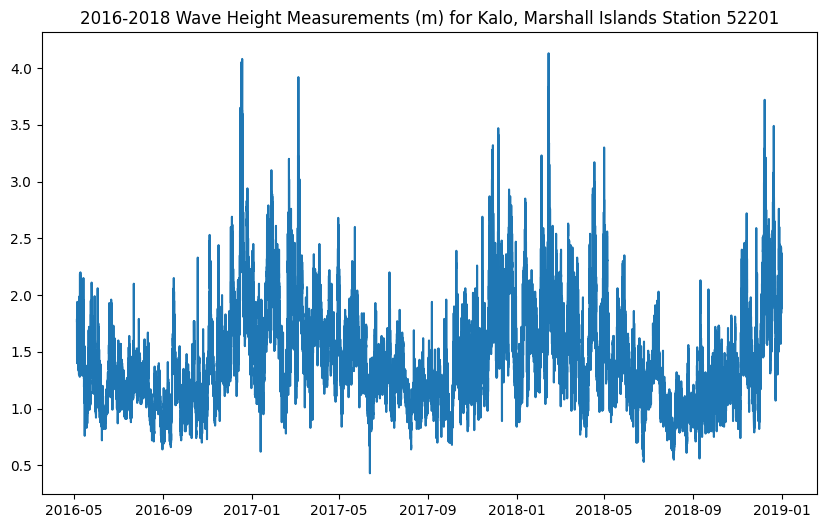

In [132]:
combined_data['WVHT'] = combined_data['WVHT'].astype(float) # changing the datatype for WVHT for a nicer look on the plot
plt.figure(figsize=(10,6)) # setting up the dimentions for our plot
plt.title('2016-2018 Wave Height Measurements (m) for Kalo, Marshall Islands Station 52201') # setting up a title
plt.plot(combined_data['WVHT']) # plotting our data

## Splitting Data for Training and Testing

For supervised machine learning, it's common to split your data for training and testing.

We'll be splitting our data 80-20, meaning 80% of our data will be used to train our ARIMA model while we use the other 20% to test how well our model did.

The training data will be stored in a new variable called *arima_train* while the testing data will be stored in *arima_test*.

In [135]:
arima_tts = combined_data['WVHT']
arima_train = arima_tts[:int(len(combined_data)*0.8)] # selecting 80% of arima_data for training
arima_test = arima_tts[int(len(combined_data)*0.8):] # selecting the last 20% of data for testing

Let's double check to make sure our train-test-split went smoothly (that the numbers add up).

In [136]:
print(len(arima_train)) # printing the length of arima_train
print(len(arima_test)) # printing the length of arima_test
print(len(combined_data)) # arima_train + arima_test should equal arima_data

34654
8664
43318


## ARIMA Parameters and Testing for Stationarity

ARIMA models have 3 parameters (p, q, d):

- AR = p (found from pacf plot)
- MA = q (found from acf plot)
- The number of differencing = d

------

In order to determine d, we need to figure out if our data is stationary.

Stationary means that your data has a constant mean, variance, and covariance that is independent of time. We can test for stationarity using the Augmented Dickey Fuller (ADF) test.

If your data is **NOT** stationary, we would need to difference it.


In [137]:
adf_test = adfuller(combined_data['WVHT']) # performing adf test
print('ADF Statistic: ', adf_test[0]) # printing results
print('P-value: ', adf_test[1])

ADF Statistic:  -9.531730751665593
P-value:  2.878717065842886e-16


If your p-value is > .05, your time series is not stationary.

If it is < .05, your time series is stationary.

Based on the p-value, our data is *not* stationary.

Because it is not stationary, we need to perform differencing (in order to figure out what the d parameter will be).

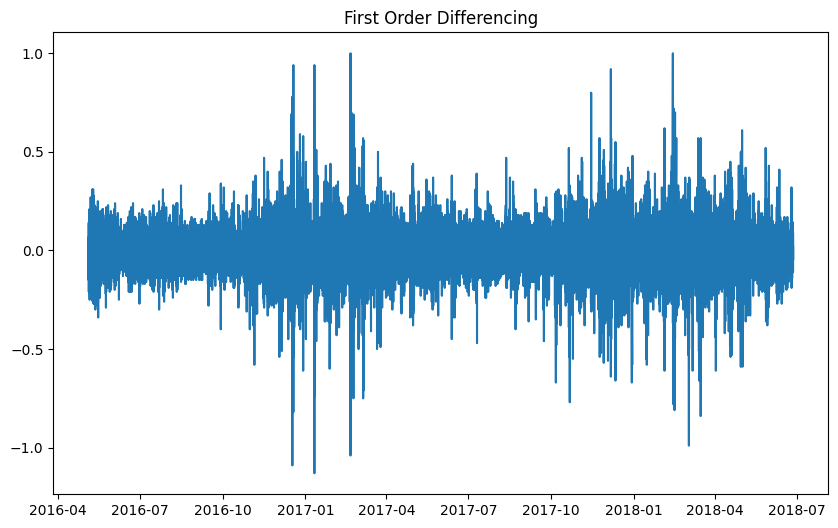

In [139]:
arima_train_diff = arima_train.diff().dropna() # first order differencing

plt.figure(figsize=(10, 6)) # setting up plot size
plt.title('First Order Differencing')
plt.plot(arima_train_diff) # plotting differencing results

Since we performed differencing *once*, our d parameter will be equal to 1. Now let's figure out p and q using autocorrelation and partial correlation plots.

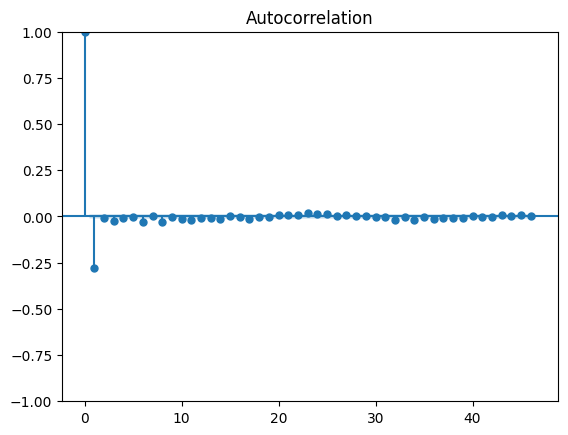

In [140]:
acf_plot = plot_acf(arima_train.diff().dropna()) # autocorrelation plot using training data

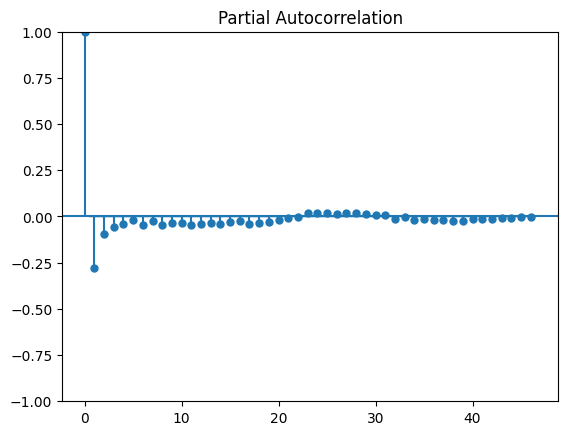

In [141]:
pacf_plot = plot_pacf(arima_train.diff().dropna()) # partial autocorrelation plot on training data

Based on this plot, we can see that 1 is significant, so p will equal 1.

Based on the acf_plot, it appears to tail off at 2, so we will use 2 for q.

Our parameters for now will be 1,2,1.

### Auto Arima

There's a cool function called auto_arima that is a statistical algorithm for determining the optimal parameters for ARIMA.

Running this code might take a minute.

In [138]:
import pmdarima as pm # importing the package

auto_arima = pm.auto_arima(arima_train, stepwise = False, seasonal = False) # using auto arima on the training data

auto_arima # printing variable

ARIMA(order=(1, 1, 3), scoring_args={}, suppress_warnings=True)

Based on these results, the optimal parameters are 1,1,2 (we were close!). We'll use that instead when building out our ARIMA model.

## Building the Model

Below we use this code to build and print out the predicted and expected wave heights for the test.

This code might take a couple of minutes.

In [61]:
waveheight_values = arima_data.WVHT
history = [x for x in arima_train]
predictions = list()
for t in range(len(arima_test)):
  model = ARIMA(history, order=(1,1,2)) # input the paramaters here within order=()
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = arima_test[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))

predicted=1.358103, expected=1.400000
predicted=1.395647, expected=1.310000
predicted=1.340426, expected=1.310000
predicted=1.327034, expected=1.340000
predicted=1.344401, expected=1.170000


KeyboardInterrupt: 

In [ ]:
import csv
with open('predictions.csv', 'w', newline='') as file:
    # Step 4: Using csv.writer to write the list to the CSV file
    writer = csv.writer(file)
    writer.writerow(predictions) # Use writerow for single list

## Visualization

After the model completes its forecast, create a plot to visualize the difference between the predicted values and expected vales for wave heights.

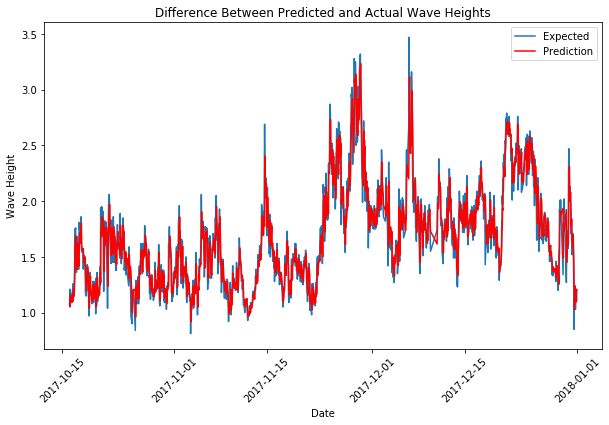

In [ ]:
test_x = arima_test.index # creating an index variable so that it's the dates

plt.figure (figsize=(10,6)) # setting up the plot size

plt.plot(test_x, arima_test, label='Expected') # plotting expected values
plt.plot(test_x, predictions, color='red', label='Prediction') # plotting predicted values
plt.xlabel('Date')
plt.ylabel('Wave Height')
plt.title('Difference Between Predicted and Actual Wave Heights')
plt.legend() # adding a legend to the plot

plt.xticks(rotation=45) # rotating the x labels for better visualization

plt.show()

## Model Evaluation

In machine learning, there are different ways to evaluate how well your model performed depending on what type of model you use.

For this project, we'll use mean absolute error and root squared value to determine how well our model did.

You can review this [resource](https://www.analyticsvidhya.com/blog/2021/10/evaluation-metric-for-regression-models/) to understand the metrics better.

In [ ]:
mae = mean_absolute_error(arima_test, predictions) # calculating mean absolute error
r_sq = r2_score(arima_test, predictions) # calculating root squared value
print('Test MAE: ', mae)
print('Test R^2: ', r_sq)

Test MAE:  0.11161533833777283
Test R^2:  0.8821110976033687


Based on these results and the visualization, this model did pretty good!

## Forecasting Values for the Future

Now that we've fitted, trained, tested, and evaluated our model, let's try to forecast future values.